In [1]:
import matplotlib.image as mpimg
import numpy as np
import os
import PIL
import matplotlib.pyplot as plt
import math
import cv2
import pandas as pd

In [2]:
from keras.preprocessing.image import ImageDataGenerator 


Using TensorFlow backend.


# Changing Directory to dataset

In [4]:
cd ..

C:\


In [5]:
cd Penn State\Projects\Lane Detection\Dataset

C:\Penn State\Projects\Lane Detection\Dataset


In [6]:
os.getcwd()

'C:\\Penn State\\Projects\\Lane Detection\\Dataset'

# Creating Pandas Dataframe for dataset

In [7]:
train = []

for file in os.listdir(os.path.join(os.getcwd(), 'RGB_data')):
    train.append([os.path.join(os.getcwd(), 'RGB_data', file),
                     os.path.join(os.getcwd(), 'Segmented_data', file)])
 

In [8]:
train = pd.DataFrame(train, columns=['Camera_Image', 'Segmented_Images'])
print(train.head())

                                        Camera_Image  \
0  C:\Penn State\Projects\Lane Detection\Dataset\...   
1  C:\Penn State\Projects\Lane Detection\Dataset\...   
2  C:\Penn State\Projects\Lane Detection\Dataset\...   
3  C:\Penn State\Projects\Lane Detection\Dataset\...   
4  C:\Penn State\Projects\Lane Detection\Dataset\...   

                                    Segmented_Images  
0  C:\Penn State\Projects\Lane Detection\Dataset\...  
1  C:\Penn State\Projects\Lane Detection\Dataset\...  
2  C:\Penn State\Projects\Lane Detection\Dataset\...  
3  C:\Penn State\Projects\Lane Detection\Dataset\...  
4  C:\Penn State\Projects\Lane Detection\Dataset\...  


Check for RGB data and corresponding Segmented label in dataframe train

In [15]:
print(train.iloc[2200][0])

C:\Penn State\Projects\Lane Detection\Dataset\RGB_data\2979.png


In [16]:
print(train.iloc[2200][1])

C:\Penn State\Projects\Lane Detection\Dataset\Segmented_data\2979.png


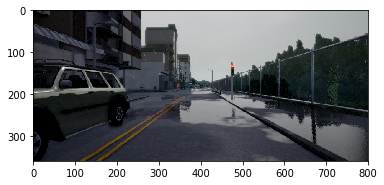

In [17]:
img1 = cv2.imread(train.iloc[0][0])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

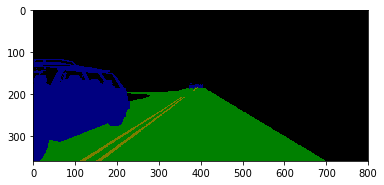

In [18]:
img2 = cv2.imread(train.iloc[0][1])
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

plt.imshow(img2)

In [19]:
os.getcwd()

'C:\\Penn State\\Projects\\Lane Detection\\Dataset'

# Make Directory for Augmented Data

In [20]:
mkdir Augmented_RGB

In [21]:
mkdir Augmented_Seg

# Data Augmentation with Keras Pre-processing
You can do this before model training. 

In [22]:
data_gen_args = dict(
                         rotation_range=30,
                         width_shift_range=0.2,
                         height_shift_range=0.1,
                         zoom_range=0.0)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

In [24]:
%%time
for j in range(len(train)):
    
    img1 = cv2.imread(train.iloc[j][0])
#img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

    img2 = cv2.imread(train.iloc[j][1])
    #img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

    img1_x = np.expand_dims(img1,0)
    img2_x = np.expand_dims(img2,0)
#plt.imshow(img4)

   
    seed = 125

    image_generator = image_datagen.flow(img1_x,seed=seed)

    mask_generator = mask_datagen.flow(img2_x,seed=seed)

    image_aug = [next(image_generator)[0] for i in range(3)]
    mask_aug = [next(mask_generator)[0].astype(np.uint8) for i in range(3)]
    
    cv2.imwrite(os.path.join(os.getcwd(), "Augmented_RGB", str(j)+"_"+str(1) + ".png"), image_aug[1])
    cv2.imwrite(os.path.join(os.getcwd(), "Augmented_RGB", str(j)+"_"+str(2) + ".png"), image_aug[2])
    
    cv2.imwrite(os.path.join(os.getcwd(), "Augmented_Seg", str(j)+"_"+str(1) + ".png"), mask_aug[1])
    cv2.imwrite(os.path.join(os.getcwd(), "Augmented_Seg", str(j)+"_"+str(2) + ".png"), mask_aug[2])

Wall time: 26min


# Creating dataframe for Augmented data

In [9]:
Augmented_data = []

for file in os.listdir(os.path.join(os.getcwd(), 'Augmented_RGB')):
    Augmented_data.append([os.path.join(os.getcwd(), 'Augmented_RGB', file),
                     os.path.join(os.getcwd(), 'Augmented_Seg', file)])
    
Augmented_data = pd.DataFrame(Augmented_data, columns=['Camera_Image', 'Segmented_Images'])
print(Augmented_data.head())

                                        Camera_Image  \
0  C:\Penn State\Projects\Lane Detection\Dataset\...   
1  C:\Penn State\Projects\Lane Detection\Dataset\...   
2  C:\Penn State\Projects\Lane Detection\Dataset\...   
3  C:\Penn State\Projects\Lane Detection\Dataset\...   
4  C:\Penn State\Projects\Lane Detection\Dataset\...   

                                    Segmented_Images  
0  C:\Penn State\Projects\Lane Detection\Dataset\...  
1  C:\Penn State\Projects\Lane Detection\Dataset\...  
2  C:\Penn State\Projects\Lane Detection\Dataset\...  
3  C:\Penn State\Projects\Lane Detection\Dataset\...  
4  C:\Penn State\Projects\Lane Detection\Dataset\...  


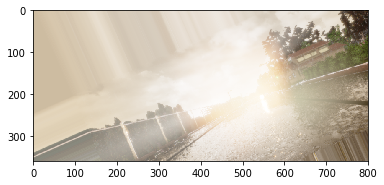

In [18]:
img1 = cv2.imread(Augmented_data.iloc[2006][0])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

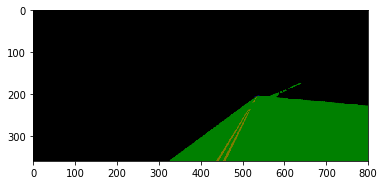

In [19]:
img1 = cv2.imread(Augmented_data.iloc[2006][1])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

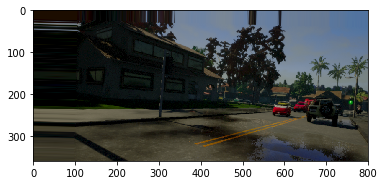

In [20]:
img1 = cv2.imread(Augmented_data.iloc[4835][0])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

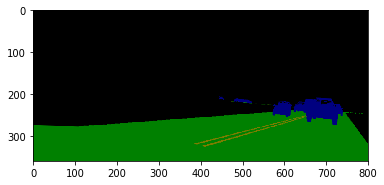

In [21]:
img1 = cv2.imread(Augmented_data.iloc[4835][1])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

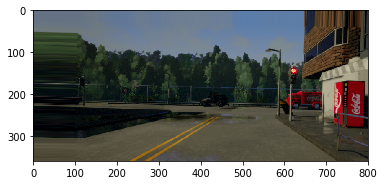

In [22]:
img1 = cv2.imread(Augmented_data.iloc[5621][0])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

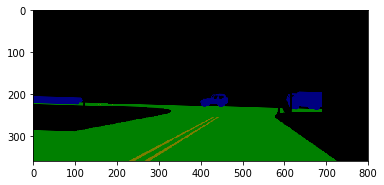

In [23]:
img1 = cv2.imread(Augmented_data.iloc[5621][1])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

# Merge Original data and Augmented data to final training data

In [10]:
Train_data = [train, Augmented_data]
Train_data = pd.concat(Train_data)

In [11]:
len(Train_data)

9000

In [12]:
Train_data.head()

,Camera_Image,Segmented_Images
0,C:\Penn State\Projects\Lane Detection\Dataset\...,C:\Penn State\Projects\Lane Detection\Dataset\...
1,C:\Penn State\Projects\Lane Detection\Dataset\...,C:\Penn State\Projects\Lane Detection\Dataset\...
2,C:\Penn State\Projects\Lane Detection\Dataset\...,C:\Penn State\Projects\Lane Detection\Dataset\...
3,C:\Penn State\Projects\Lane Detection\Dataset\...,C:\Penn State\Projects\Lane Detection\Dataset\...
4,C:\Penn State\Projects\Lane Detection\Dataset\...,C:\Penn State\Projects\Lane Detection\Dataset\...


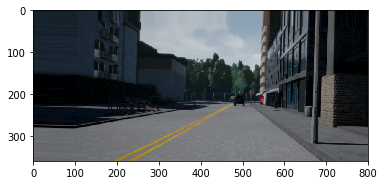

In [13]:
img1 = cv2.imread(Train_data.iloc[7455][0])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

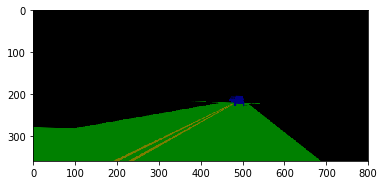

In [14]:
img1 = cv2.imread(Train_data.iloc[7455][1])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

# Visualising Dataset

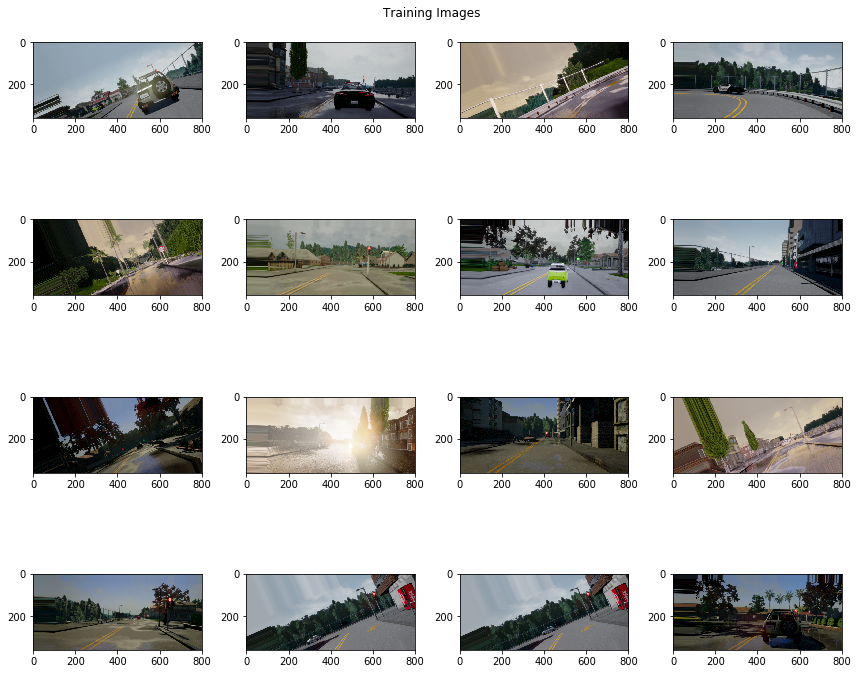

In [30]:
from random import randint

x = [randint(0, len(Train_data)) for p in range(16)]
f, axs = plt.subplots(4,4, figsize=(12,10))
f.tight_layout()
f.suptitle('Training Images')
for i, ax in enumerate(axs.ravel()):
    ax.grid('off')
    ax.imshow(mpimg.imread(Train_data.iloc[x[i]][0]))

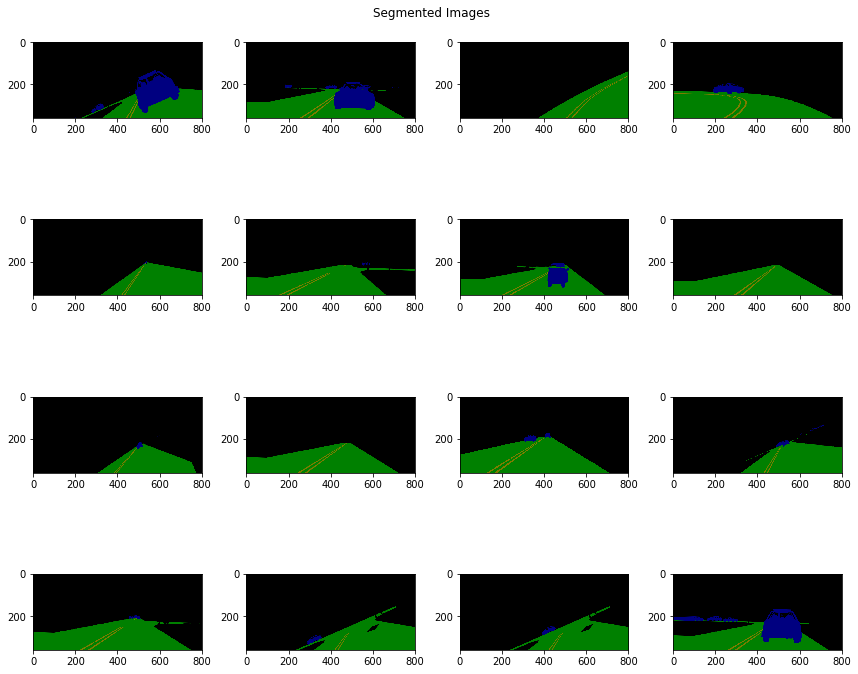

In [33]:
f, axs = plt.subplots(4,4, figsize=(12,10))
f.tight_layout()
f.suptitle('Segmented Images')
for i, ax in enumerate(axs.ravel()):
    ax.grid('off')
    ax.imshow(mpimg.imread(Train_data.iloc[x[i]][1]))

# Converting data to Numpy 
raw images to Numpy array

In [13]:
%%time

RGB = []
Segmented= []

for i in range(len(Train_data)):
    img = cv2.imread(Train_data.iloc[i][0])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGB.append(img)
    img = cv2.imread(Train_data.iloc[i][1])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    Segmented.append(img)
    if i%1000 == 0:
        print(i," images are done")
RGB = np.array(RGB) #Camera RGB data
Segmented = np.array(Segmented) #Segmented data

0  images are done
1000  images are done
2000  images are done
3000  images are done
4000  images are done
5000  images are done
6000  images are done
7000  images are done
8000  images are done
Wall time: 4min 39s


In [35]:
print("Shape of RGB data is {}".format(RGB.shape))
print("Shape of Segmented data is {}".format(Segmented.shape))

Shape of RGB data is (9000, 360, 800, 3)
Shape of Segmented data is (9000, 360, 800, 3)


In [20]:
RGB.shape

(9000, 360, 800, 3)

In [ ]:
%%time
import bz2
import pickle
data = {}
data["RGB"] = RGB
#data["Segmented"] = Segmented
sfile = bz2.BZ2File('Lane_dataset5.pbz2', 'w')
pickle.dump(data, sfile, protocol=4)
#pickle.close()

Wall time: 0 ns


In [1]:
#pickle.close()

# Saving dataset to H5PY format so we can reuse agian

In [1]:
import h5py

In [52]:
%%time

hf = h5py.File('Lane_data2.h5', 'w')

hf.create_dataset('RGB', data=RGB, compression='gzip', compression_opts= 9)
hf.create_dataset('Segmented', data=Segmented, compression="gzip", compression_opts= 9)

hf.close()

Wall time: 24min 49s


# Loading dataset from H5PY to Numpy array
Converting all images to numpy takes approax 4 min while loading H5PY data file takes only 22.9ms!!!

In [54]:
%%time

hf = h5py.File('Lane_data2.h5', 'r')
RGB2 = hf.get('RGB')
Segmented2 = hf.get('Segmented')


Wall time: 22.9 ms


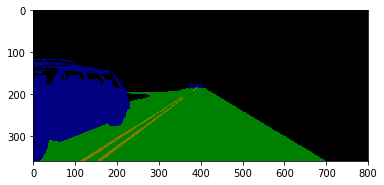

In [56]:
plt.imshow(Segmented2[1])

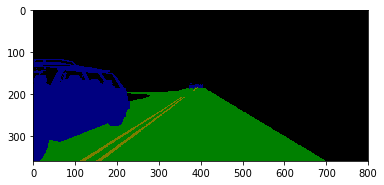

In [57]:
img1 = cv2.imread(Train_data.iloc[0][1])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

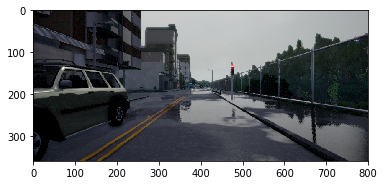

In [58]:
plt.imshow(RGB2[1])

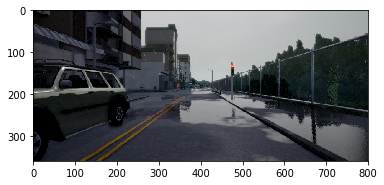

In [59]:
img1 = cv2.imread(Train_data.iloc[0][0])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

In [12]:
%time
x_train = []
y_train = []
with h5py.File(os.path.join(os.getcwd(),'Lane_data2.h5'), 'r') as f:
    x_train = f['RGB'][()]
    y_train = f['Segmented'][()]

Wall time: 0 ns


In [11]:
type(x_train)

numpy.ndarray